In [11]:
import numpy
print(numpy.__version__)

1.26.4


In [12]:
import pandas as pd
import numpy as np
np.bool = bool  # temporary compatibility shim
from pathlib import Path
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load train.csv
data_dir = Path("../data_processed")
train_df = pd.read_csv(data_dir / "all_features_with_macro.csv", index_col=0, parse_dates=True)

print(f"TData shape: {train_df.shape}")
print(f"Date range: {train_df.index.min()} to {train_df.index.max()}")
print(f"\nColumns: {list(train_df.columns)}")
print(f"\nFirst few rows:")
train_df.head()


TData shape: (6110, 38)
Date range: 2001-01-22 00:00:00 to 2025-11-20 00:00:00

Columns: ['LOPBDY LME Comdty', 'returns', 'MA7', 'MA30', 'rolling_volatility', 'EMA5', 'EMA15', 'EMA30', 'MACD5', 'MACD15', 'MACD30', 'RSI', 'BB_upper', 'BB_middle', 'BB_lower', 'return_7d', 'target', 'future_return', 'future_MA7', 'future_MA30', 'future_rolling_volatility', 'future_return_7d', 'dxy_return_7d', 'yield_change_7d', 'dxy_ma_diff_20_5', 'copper_return_7d', 'wti_return_7d', 'lead_to_copper_ratio', 'copper_ma_diff_20_5', 'copper_vol_7d', 'wti_vol_7d', 'corr_lead_copper_30d', 'corr_lead_dxy_30d', 'IDF', 'divergence_lc', 'oil_dxy_interaction', 'joint_momentum', 'regime_dxy_yield']

First few rows:


,LOPBDY LME Comdty,returns,MA7,MA30,rolling_volatility,EMA5,EMA15,EMA30,MACD5,MACD15,...,copper_ma_diff_20_5,copper_vol_7d,wti_vol_7d,corr_lead_copper_30d,corr_lead_dxy_30d,IDF,divergence_lc,oil_dxy_interaction,joint_momentum,regime_dxy_yield
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-22,484.0,0.016807,466.642857,465.850000,0.016046,472.477942,468.758402,466.470573,5.445235,1.725695,...,-0.002127,0.021711,0.024679,0.227243,-0.225959,0.053504,0.000993,0.000293,0.045518,1.0
2001-01-23,494.0,0.020661,470.428571,466.750000,0.016374,479.651961,471.913602,468.246665,10.621677,2.883317,...,-0.002719,0.021711,0.041656,0.217905,-0.193981,0.012298,0.037864,0.000027,0.082308,1.0
2001-01-24,490.5,-0.007085,473.857143,467.533333,0.016455,483.267974,474.236902,469.682364,12.647340,3.616268,...,-0.000371,0.021846,0.041362,0.227842,-0.223879,-0.019303,0.054526,-0.000706,0.043869,1.0
2001-01-25,489.0,-0.003058,479.000000,468.383333,0.016389,485.178650,476.082289,470.928663,13.196581,4.100221,...,0.001295,0.019527,0.041402,0.233019,-0.223084,-0.007825,0.062501,-0.000444,0.096440,1.0
2001-01-26,500.0,0.022495,485.642857,469.933333,0.016184,490.119100,479.072003,472.804233,16.061629,5.014532,...,0.002259,0.019397,0.040938,0.239768,-0.214631,0.006702,0.093516,0.000026,0.111556,1.0


In [14]:
# Data Quality Check
print("="*60)
print("DATA QUALITY CHECK")
print("="*60)

# Check for missing values
print("\n1. Missing Values Analysis:")
print(f"   Total missing values: {train_df.isna().sum().sum()}")
print(f"   Missing values per column:")
missing_counts = train_df.isna().sum()
missing_cols = missing_counts[missing_counts > 0]
if len(missing_cols) > 0:
    print(missing_cols.to_string())
else:
    print("   No missing values found!")

# Check for duplicate rows
print(f"\n2. Duplicate Rows:")
print(f"   Total duplicate rows: {train_df.duplicated().sum()}")

# Check for duplicate dates
print(f"\n3. Duplicate Dates:")
duplicate_dates = train_df.index.duplicated().sum()
print(f"   Duplicate dates: {duplicate_dates}")

# Check data consistency
print(f"\n4. Data Consistency:")
print(f"   Date range: {train_df.index.min()} to {train_df.index.max()}")
print(f"   Total days: {(train_df.index.max() - train_df.index.min()).days}")
print(f"   Number of observations: {len(train_df)}")
print(f"   Expected trading days: ~{(train_df.index.max() - train_df.index.min()).days * 5/7:.0f} (assuming 5 trading days per week)")
print(f"   Data completeness: {len(train_df) / ((train_df.index.max() - train_df.index.min()).days * 5/7) * 100:.1f}%")

# Check for infinite values
print(f"\n5. Infinite Values:")
inf_counts = np.isinf(train_df.select_dtypes(include=[np.number])).sum()
inf_cols = inf_counts[inf_counts > 0]
if len(inf_cols) > 0:
    print(inf_cols.to_string())
else:
    print("   No infinite values found!")


DATA QUALITY CHECK

1. Missing Values Analysis:
   Total missing values: 0
   Missing values per column:
   No missing values found!

2. Duplicate Rows:
   Total duplicate rows: 0

3. Duplicate Dates:
   Duplicate dates: 0

4. Data Consistency:
   Date range: 2001-01-22 00:00:00 to 2025-11-20 00:00:00
   Total days: 9068
   Number of observations: 6110
   Expected trading days: ~6477 (assuming 5 trading days per week)
   Data completeness: 94.3%

5. Infinite Values:
   No infinite values found!


TARGET VARIABLE ANALYSIS

1. Basic Statistics for return_7d:
count    6110.000000
mean        0.002668
std         0.049835
min        -0.287616
25%        -0.024663
50%         0.001277
75%         0.028904
max         0.334211
Name: return_7d, dtype: float64

2. Additional Statistics:
   Mean: 0.002668
   Median: 0.001277
   Std Dev: 0.049835
   Skewness: 0.2028
   Kurtosis: 2.8127
   Min: -0.287616
   Max: 0.334211
   Range: 0.621827

3. Outliers (IQR method):
   Lower bound: -0.105015
   Upper bound: 0.109256
   Number of outliers: 281 (4.60%)


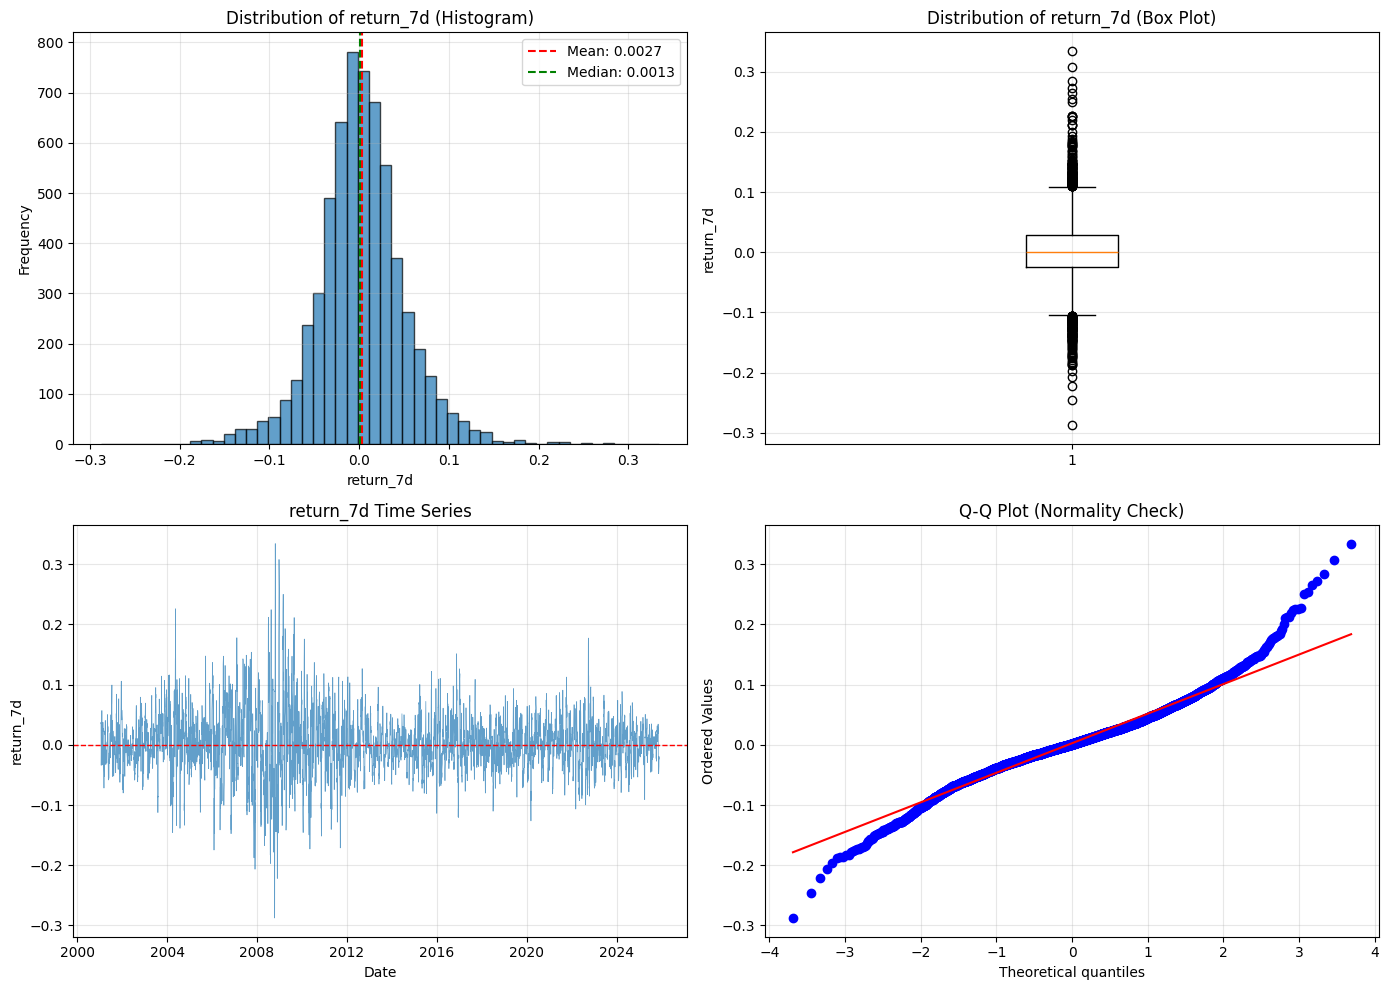


4. Classification Target (target) Analysis:
target
1    3122
0    2988
Name: count, dtype: int64
   Positive class ratio: 0.5110
   Negative class ratio: 0.4890


In [15]:
# Target Variable Analysis
print("="*60)
print("TARGET VARIABLE ANALYSIS")
print("="*60)

# Extract target variable
y = train_df['return_7d'].dropna()

print(f"\n1. Basic Statistics for return_7d:")
print(y.describe())

print(f"\n2. Additional Statistics:")
print(f"   Mean: {y.mean():.6f}")
print(f"   Median: {y.median():.6f}")
print(f"   Std Dev: {y.std():.6f}")
print(f"   Skewness: {y.skew():.4f}")
print(f"   Kurtosis: {y.kurtosis():.4f}")
print(f"   Min: {y.min():.6f}")
print(f"   Max: {y.max():.6f}")
print(f"   Range: {y.max() - y.min():.6f}")

# Check for outliers using IQR
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = y[(y < lower_bound) | (y > upper_bound)]
print(f"\n3. Outliers (IQR method):")
print(f"   Lower bound: {lower_bound:.6f}")
print(f"   Upper bound: {upper_bound:.6f}")
print(f"   Number of outliers: {len(outliers)} ({len(outliers)/len(y)*100:.2f}%)")

# Visualize target variable distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Histogram
axes[0, 0].hist(y, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(y.mean(), color='red', linestyle='--', label=f'Mean: {y.mean():.4f}')
axes[0, 0].axvline(y.median(), color='green', linestyle='--', label=f'Median: {y.median():.4f}')
axes[0, 0].set_xlabel('return_7d')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of return_7d (Histogram)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Box plot
axes[0, 1].boxplot(y, vert=True)
axes[0, 1].set_ylabel('return_7d')
axes[0, 1].set_title('Distribution of return_7d (Box Plot)')
axes[0, 1].grid(True, alpha=0.3)

# Time series plot
axes[1, 0].plot(train_df.index, train_df['return_7d'], linewidth=0.5, alpha=0.7)
axes[1, 0].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('return_7d')
axes[1, 0].set_title('return_7d Time Series')
axes[1, 0].grid(True, alpha=0.3)

# Q-Q plot (for normality check)
from scipy import stats
stats.probplot(y, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot (Normality Check)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Classification target analysis
if 'target' in train_df.columns:
    print(f"\n4. Classification Target (target) Analysis:")
    target_counts = train_df['target'].value_counts()
    print(target_counts)
    print(f"   Positive class ratio: {target_counts.get(1, 0) / len(train_df):.4f}")
    print(f"   Negative class ratio: {target_counts.get(0, 0) / len(train_df):.4f}")


PRICE TIME SERIES ANALYSIS

1. Price Statistics:
count    6110.000000
mean     1781.597300
std       662.911187
min       402.500000
25%      1461.125000
50%      1981.250000
75%      2175.000000
max      3980.000000
Name: LOPBDY LME Comdty, dtype: float64


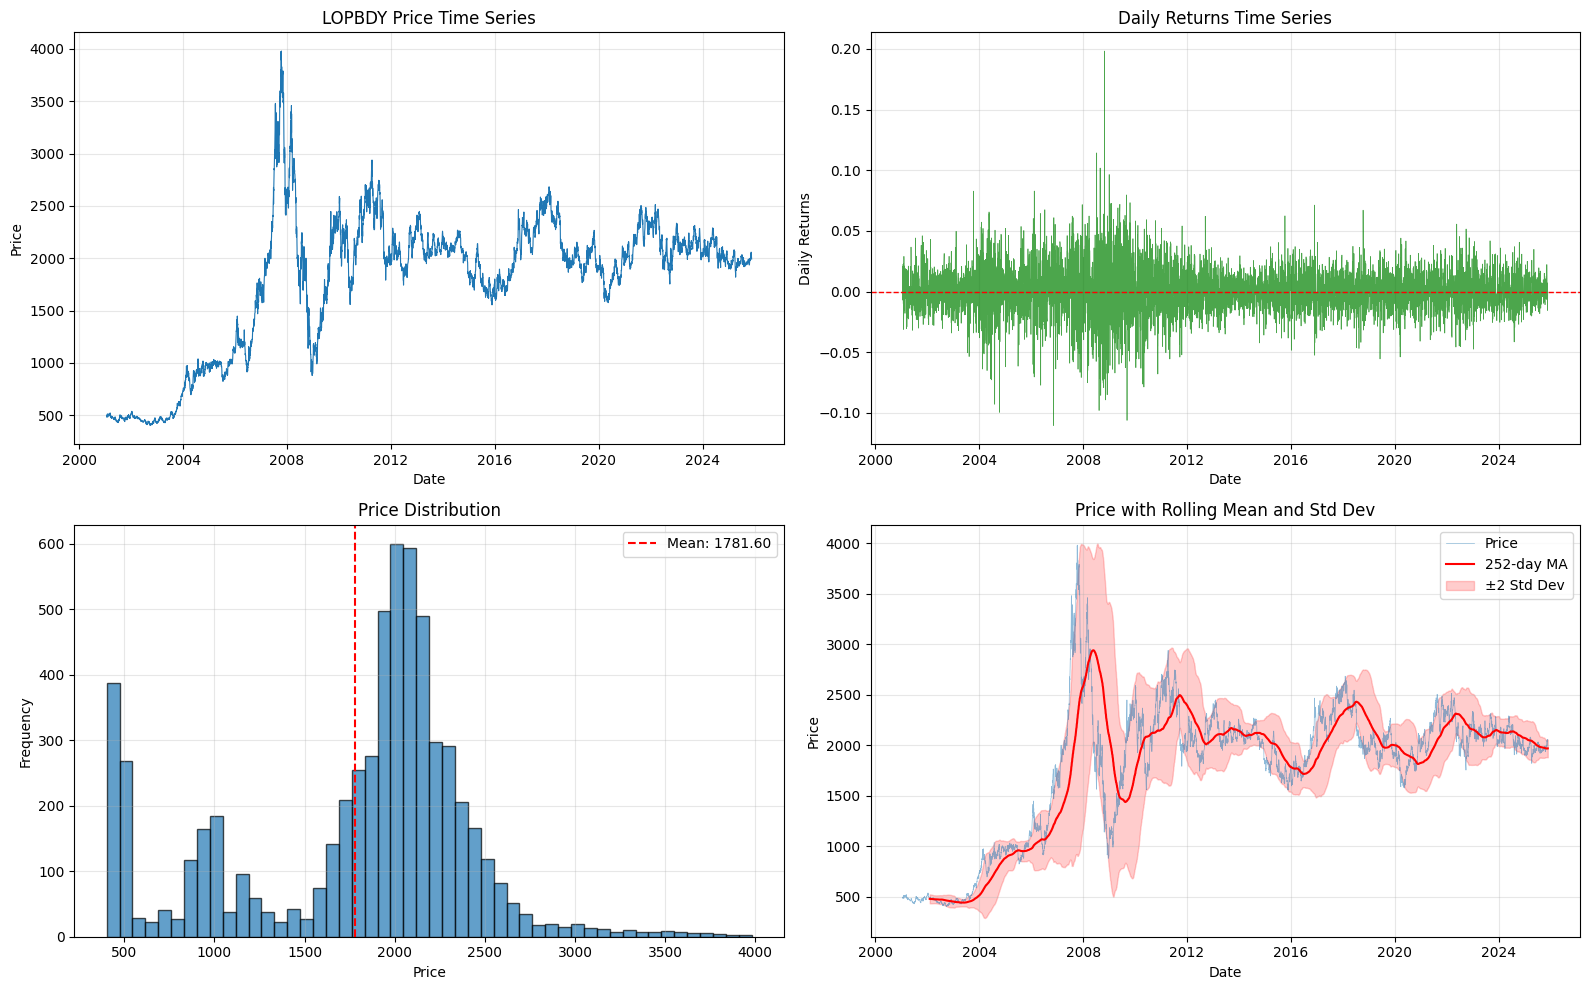

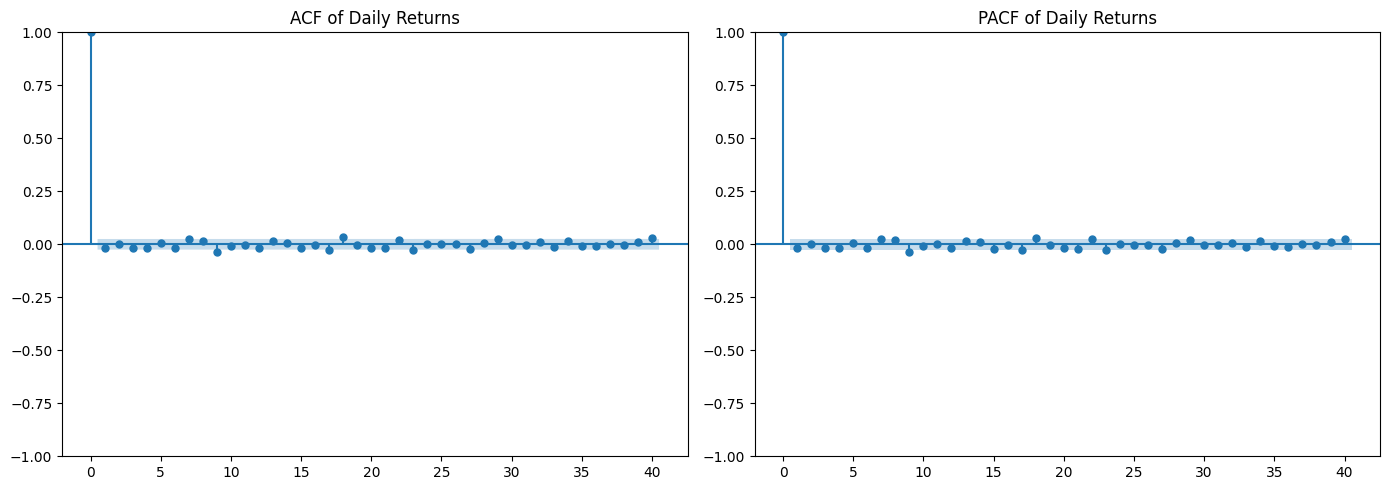

In [16]:
# Price Time Series Analysis
print("="*60)
print("PRICE TIME SERIES ANALYSIS")
print("="*60)

if 'LOPBDY LME Comdty' in train_df.columns:
    price_col = 'LOPBDY LME Comdty'
    
    print(f"\n1. Price Statistics:")
    print(train_df[price_col].describe())
    
    # Visualize price time series
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Price time series
    axes[0, 0].plot(train_df.index, train_df[price_col], linewidth=0.8)
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Price')
    axes[0, 0].set_title('LOPBDY Price Time Series')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Returns time series
    if 'returns' in train_df.columns:
        axes[0, 1].plot(train_df.index, train_df['returns'], linewidth=0.5, alpha=0.7, color='green')
        axes[0, 1].axhline(0, color='red', linestyle='--', linewidth=1)
        axes[0, 1].set_xlabel('Date')
        axes[0, 1].set_ylabel('Daily Returns')
        axes[0, 1].set_title('Daily Returns Time Series')
        axes[0, 1].grid(True, alpha=0.3)
    
    # Price distribution
    axes[1, 0].hist(train_df[price_col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[1, 0].axvline(train_df[price_col].mean(), color='red', linestyle='--', 
                       label=f'Mean: {train_df[price_col].mean():.2f}')
    axes[1, 0].set_xlabel('Price')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Price Distribution')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Rolling statistics
    rolling_mean = train_df[price_col].rolling(window=252).mean()  # 1 year
    rolling_std = train_df[price_col].rolling(window=252).std()
    axes[1, 1].plot(train_df.index, train_df[price_col], linewidth=0.5, alpha=0.5, label='Price')
    axes[1, 1].plot(train_df.index, rolling_mean, linewidth=1.5, label='252-day MA', color='red')
    axes[1, 1].fill_between(train_df.index, 
                           rolling_mean - 2*rolling_std, 
                           rolling_mean + 2*rolling_std, 
                           alpha=0.2, color='red', label='±2 Std Dev')
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Price')
    axes[1, 1].set_title('Price with Rolling Mean and Std Dev')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Autocorrelation analysis
    from statsmodels.tsa.stattools import acf, pacf
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
    
    if 'returns' in train_df.columns:
        returns_clean = train_df['returns'].dropna()
        if len(returns_clean) > 40:
            fig, axes = plt.subplots(1, 2, figsize=(14, 5))
            plot_acf(returns_clean, lags=40, ax=axes[0], title='ACF of Daily Returns')
            plot_pacf(returns_clean, lags=40, ax=axes[1], title='PACF of Daily Returns')
            plt.tight_layout()
            plt.show()


FEATURE DISTRIBUTION VISUALIZATION

Visualizing distributions for 9 key features:
['returns', 'MA7', 'MA30', 'RSI', 'rolling_volatility', 'MACD30', 'dxy_return_7d', 'copper_return_7d', 'wti_return_7d']


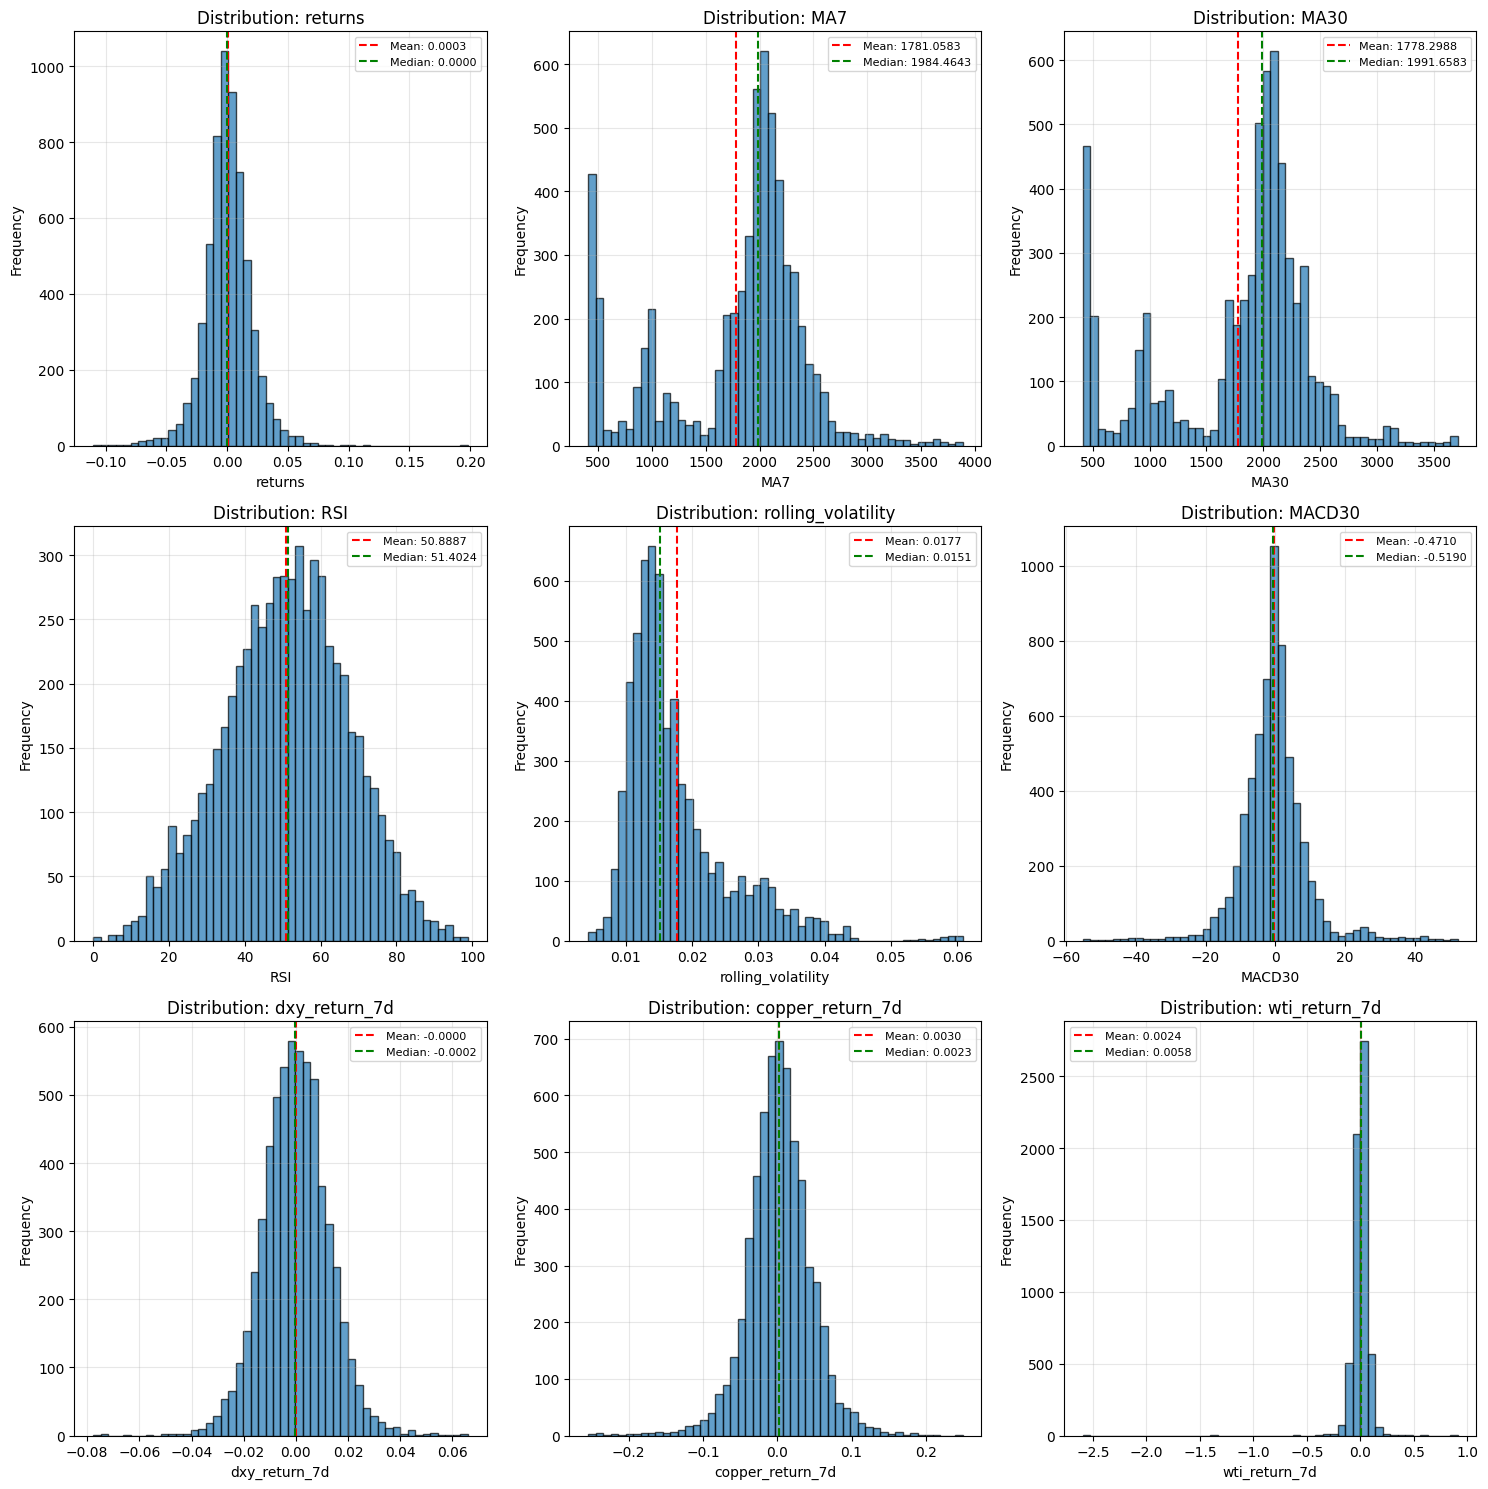

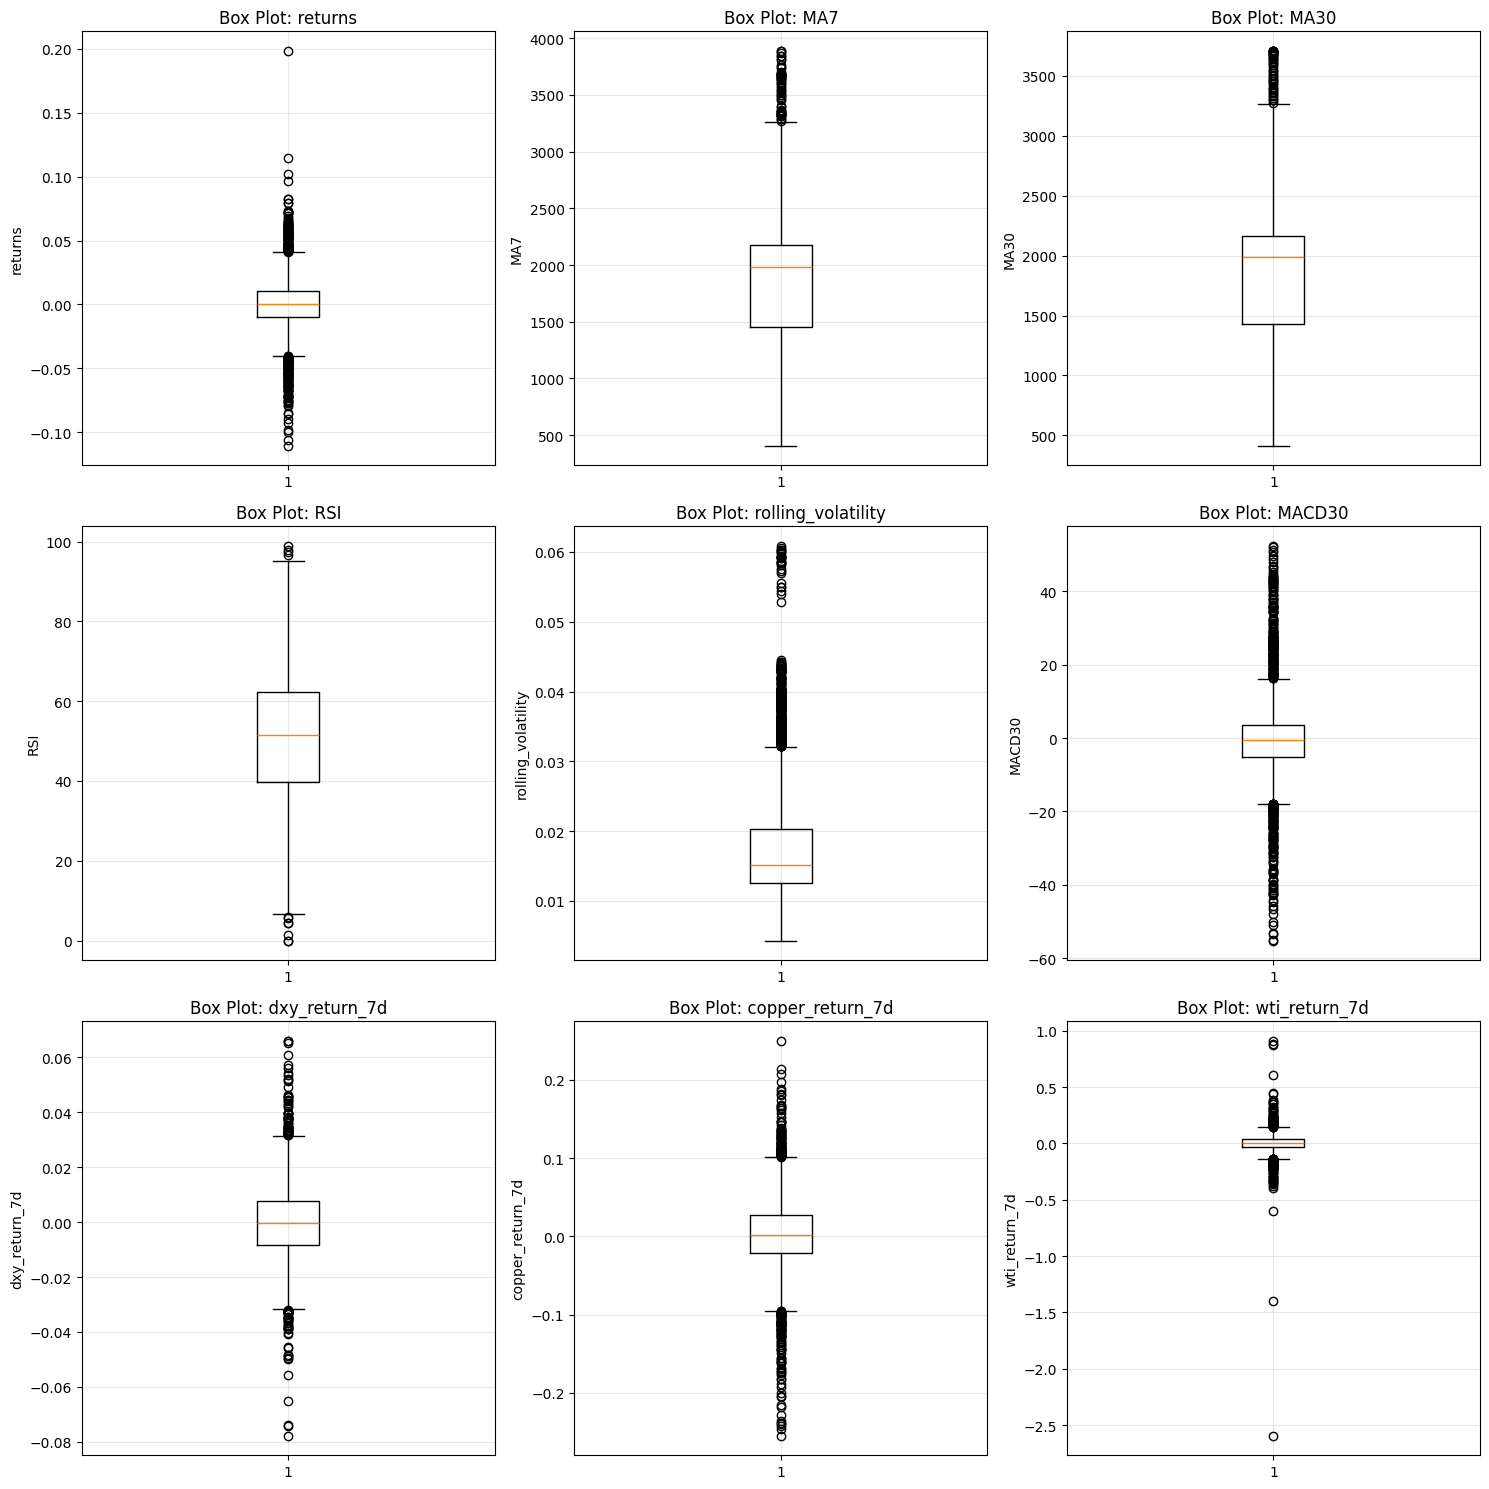

In [17]:
# Feature Distribution Visualization
print("="*60)
print("FEATURE DISTRIBUTION VISUALIZATION")
print("="*60)

# Select key features for visualization
key_features = ['returns', 'MA7', 'MA30', 'RSI', 'rolling_volatility', 
                'MACD30', 'dxy_return_7d', 'copper_return_7d', 'wti_return_7d']
key_features = [f for f in key_features if f in X.columns]

print(f"\nVisualizing distributions for {len(key_features)} key features:")
print(key_features)

# Create subplots for distributions
n_features = len(key_features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_features > 1 else [axes]

for i, feature in enumerate(key_features):
    if i < len(axes):
        data = X[feature].dropna()
        axes[i].hist(data, bins=50, edgecolor='black', alpha=0.7)
        axes[i].axvline(data.mean(), color='red', linestyle='--', 
                       label=f'Mean: {data.mean():.4f}')
        axes[i].axvline(data.median(), color='green', linestyle='--', 
                       label=f'Median: {data.median():.4f}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Distribution: {feature}')
        axes[i].legend(fontsize=8)
        axes[i].grid(True, alpha=0.3)

# Hide unused subplots
for i in range(len(key_features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Box plots for key features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_features > 1 else [axes]

for i, feature in enumerate(key_features):
    if i < len(axes):
        data = X[feature].dropna()
        axes[i].boxplot(data, vert=True)
        axes[i].set_ylabel(feature)
        axes[i].set_title(f'Box Plot: {feature}')
        axes[i].grid(True, alpha=0.3)

# Hide unused subplots
for i in range(len(key_features), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


FEATURE-TARGET RELATIONSHIP ANALYSIS

1. Top 20 Features by Absolute Correlation with return_7d:
             Feature  Correlation
       future_return     0.154350
            BB_upper    -0.102001
                EMA5    -0.101597
                 MA7    -0.101403
               EMA15    -0.100384
          future_MA7    -0.099456
           BB_middle    -0.099206
               EMA30    -0.098883
                MA30    -0.096923
         future_MA30    -0.096348
            BB_lower    -0.094765
lead_to_copper_ratio    -0.061062
    dxy_ma_diff_20_5     0.049904
                 IDF     0.044338
       divergence_lc    -0.043931
       wti_return_7d     0.039800
    future_return_7d     0.039440
       dxy_return_7d    -0.036871
   corr_lead_dxy_30d     0.032619
              MACD15    -0.030807


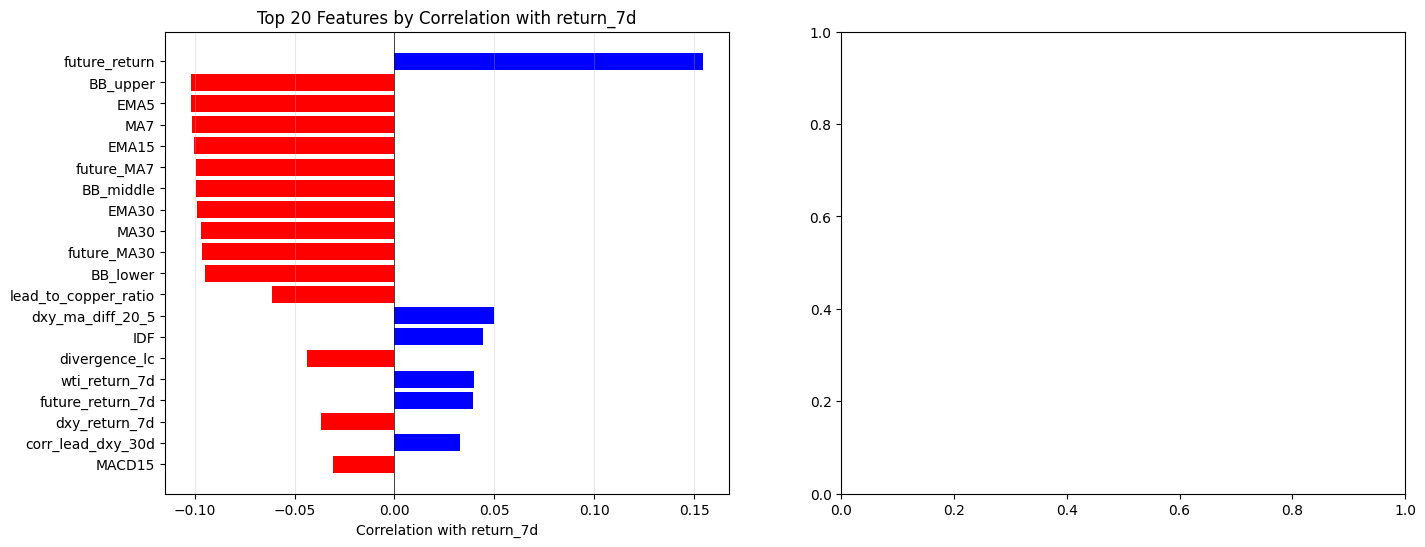

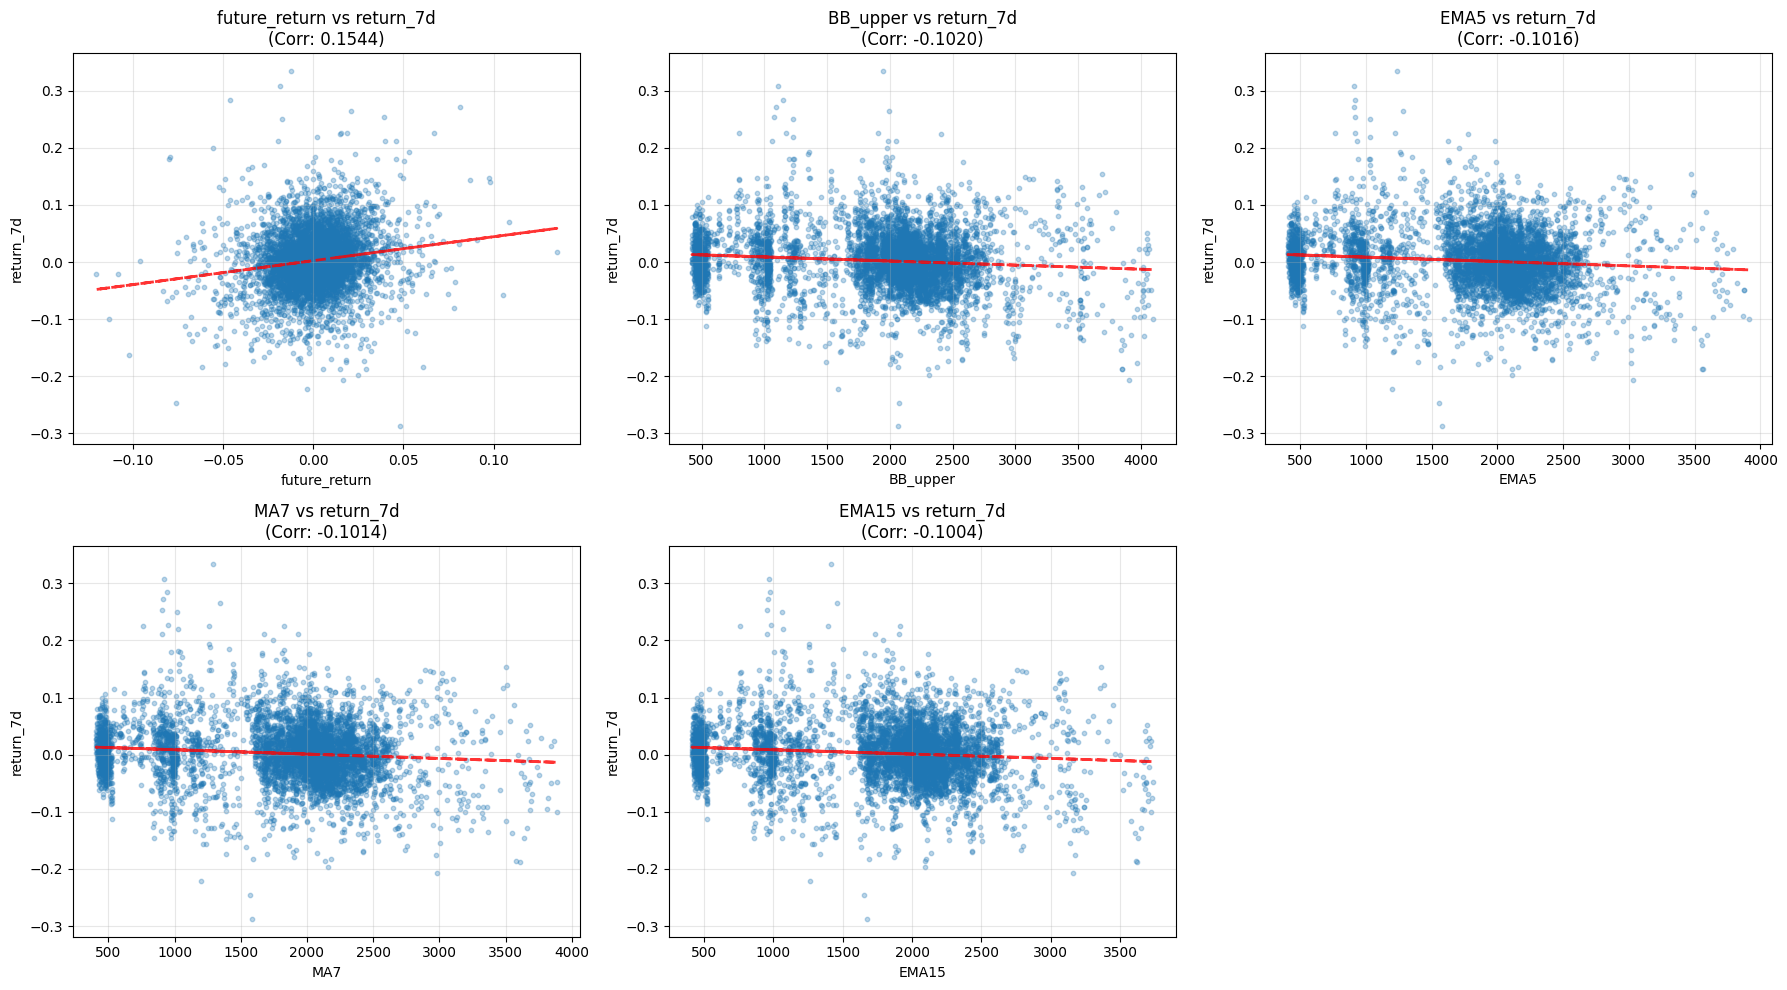


2. Summary Statistics:
   Max positive correlation: 0.1544 (future_return)
   Max negative correlation: -0.1020 (BB_upper)
   Mean absolute correlation: 0.0490
   Features with |correlation| > 0.1: 5
   Features with |correlation| > 0.2: 0


In [18]:
# Feature-Target Relationship Analysis
print("="*60)
print("FEATURE-TARGET RELATIONSHIP ANALYSIS")
print("="*60)

# Calculate correlation between features and target
y_target = train_df['return_7d'].dropna()
X_aligned = X.loc[y_target.index]

# Calculate correlations
feature_target_corr = {}
for feature in X_aligned.columns:
    feature_data = X_aligned[feature].dropna()
    # Align indices
    common_idx = feature_data.index.intersection(y_target.index)
    if len(common_idx) > 0:
        corr = np.corrcoef(feature_data.loc[common_idx], y_target.loc[common_idx])[0, 1]
        feature_target_corr[feature] = corr

# Convert to DataFrame and sort
corr_df = pd.DataFrame({
    'Feature': list(feature_target_corr.keys()),
    'Correlation': list(feature_target_corr.values())
}).sort_values('Correlation', key=abs, ascending=False)

print(f"\n1. Top 20 Features by Absolute Correlation with return_7d:")
print(corr_df.head(20).to_string(index=False))

# Visualize correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot of top correlations
top_n = 20
top_corr = corr_df.head(top_n)
colors = ['red' if c < 0 else 'blue' for c in top_corr['Correlation']]
axes[0].barh(range(len(top_corr)), top_corr['Correlation'].values, color=colors)
axes[0].set_yticks(range(len(top_corr)))
axes[0].set_yticklabels(top_corr['Feature'].values)
axes[0].set_xlabel('Correlation with return_7d')
axes[0].set_title(f'Top {top_n} Features by Correlation with return_7d')
axes[0].axvline(0, color='black', linestyle='-', linewidth=0.5)
axes[0].grid(True, alpha=0.3, axis='x')
axes[0].invert_yaxis()

# Scatter plots for top 5 features
top_5_features = corr_df.head(5)['Feature'].tolist()
for i, feature in enumerate(top_5_features):
    if i < 5:
        row = i // 3
        col = i % 3
        if i == 0:
            ax = axes[1]
        else:
            # Create additional subplot if needed
            pass

# Create separate figure for scatter plots
fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
axes2 = axes2.flatten()

for i, feature in enumerate(top_5_features[:6]):
    feature_data = X_aligned[feature].dropna()
    common_idx = feature_data.index.intersection(y_target.index)
    if len(common_idx) > 0:
        axes2[i].scatter(feature_data.loc[common_idx], y_target.loc[common_idx], 
                       alpha=0.3, s=10)
        axes2[i].set_xlabel(feature)
        axes2[i].set_ylabel('return_7d')
        axes2[i].set_title(f'{feature} vs return_7d\n(Corr: {feature_target_corr[feature]:.4f})')
        axes2[i].grid(True, alpha=0.3)
        # Add trend line
        z = np.polyfit(feature_data.loc[common_idx], y_target.loc[common_idx], 1)
        p = np.poly1d(z)
        axes2[i].plot(feature_data.loc[common_idx], p(feature_data.loc[common_idx]), 
                     "r--", alpha=0.8, linewidth=2)

# Hide unused subplots
for i in range(len(top_5_features), 6):
    axes2[i].axis('off')

plt.tight_layout()
plt.show()

print(f"\n2. Summary Statistics:")
print(f"   Max positive correlation: {corr_df['Correlation'].max():.4f} ({corr_df.loc[corr_df['Correlation'].idxmax(), 'Feature']})")
print(f"   Max negative correlation: {corr_df['Correlation'].min():.4f} ({corr_df.loc[corr_df['Correlation'].idxmin(), 'Feature']})")
print(f"   Mean absolute correlation: {corr_df['Correlation'].abs().mean():.4f}")
print(f"   Features with |correlation| > 0.1: {(corr_df['Correlation'].abs() > 0.1).sum()}")
print(f"   Features with |correlation| > 0.2: {(corr_df['Correlation'].abs() > 0.2).sum()}")


In [19]:
# Extract features (X) - exclude target variables
irr_cols = ['LOPBDY LME Comdty', 'return_7d', 'target', 'Date']
X = train_df.drop(columns=irr_cols, errors='ignore')

print(f"Feature matrix X shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"\nFeature columns:")
print(list(X.columns))
print(f"\nFirst few rows of X:")
X.head()

Feature matrix X shape: (6110, 35)
Number of features: 35

Feature columns:
['returns', 'MA7', 'MA30', 'rolling_volatility', 'EMA5', 'EMA15', 'EMA30', 'MACD5', 'MACD15', 'MACD30', 'RSI', 'BB_upper', 'BB_middle', 'BB_lower', 'future_return', 'future_MA7', 'future_MA30', 'future_rolling_volatility', 'future_return_7d', 'dxy_return_7d', 'yield_change_7d', 'dxy_ma_diff_20_5', 'copper_return_7d', 'wti_return_7d', 'lead_to_copper_ratio', 'copper_ma_diff_20_5', 'copper_vol_7d', 'wti_vol_7d', 'corr_lead_copper_30d', 'corr_lead_dxy_30d', 'IDF', 'divergence_lc', 'oil_dxy_interaction', 'joint_momentum', 'regime_dxy_yield']

First few rows of X:


,returns,MA7,MA30,rolling_volatility,EMA5,EMA15,EMA30,MACD5,MACD15,MACD30,...,copper_ma_diff_20_5,copper_vol_7d,wti_vol_7d,corr_lead_copper_30d,corr_lead_dxy_30d,IDF,divergence_lc,oil_dxy_interaction,joint_momentum,regime_dxy_yield
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-22,0.016807,466.642857,465.850000,0.016046,472.477942,468.758402,466.470573,5.445235,1.725695,-0.562134,...,-0.002127,0.021711,0.024679,0.227243,-0.225959,0.053504,0.000993,0.000293,0.045518,1.0
2001-01-23,0.020661,470.428571,466.750000,0.016374,479.651961,471.913602,468.246665,10.621677,2.883317,-0.783619,...,-0.002719,0.021711,0.041656,0.217905,-0.193981,0.012298,0.037864,0.000027,0.082308,1.0
2001-01-24,-0.007085,473.857143,467.533333,0.016455,483.267974,474.236902,469.682364,12.647340,3.616268,-0.938270,...,-0.000371,0.021846,0.041362,0.227842,-0.223879,-0.019303,0.054526,-0.000706,0.043869,1.0
2001-01-25,-0.003058,479.000000,468.383333,0.016389,485.178650,476.082289,470.928663,13.196581,4.100221,-1.053405,...,0.001295,0.019527,0.041402,0.233019,-0.223084,-0.007825,0.062501,-0.000444,0.096440,1.0
2001-01-26,0.022495,485.642857,469.933333,0.016184,490.119100,479.072003,472.804233,16.061629,5.014532,-1.253237,...,0.002259,0.019397,0.040938,0.239768,-0.214631,0.006702,0.093516,0.000026,0.111556,1.0


Explained Variance Ratio for first 20 components:
PC1: 0.2883 (28.83%)
PC2: 0.1622 (16.22%)
PC3: 0.0741 (7.41%)
PC4: 0.0722 (7.22%)
PC5: 0.0513 (5.13%)
PC6: 0.0465 (4.65%)
PC7: 0.0392 (3.92%)
PC8: 0.0335 (3.35%)
PC9: 0.0308 (3.08%)
PC10: 0.0291 (2.91%)
PC11: 0.0258 (2.58%)
PC12: 0.0251 (2.51%)
PC13: 0.0218 (2.18%)
PC14: 0.0211 (2.11%)
PC15: 0.0200 (2.00%)
PC16: 0.0134 (1.34%)
PC17: 0.0129 (1.29%)
PC18: 0.0109 (1.09%)
PC19: 0.0086 (0.86%)
PC20: 0.0064 (0.64%)

Cumulative variance for first 20 components: 0.8273 (82.73%)

Top 20 Features based on PCA:
             Feature  Importance
    dxy_ma_diff_20_5    3.320700
       dxy_return_7d    3.288762
       copper_vol_7d    3.264889
lead_to_copper_ratio    3.264183
       future_return    3.207454
   corr_lead_dxy_30d    3.138140
             returns    3.098813
 copper_ma_diff_20_5    3.066122
     yield_change_7d    3.049712
 oil_dxy_interaction    2.972233
corr_lead_copper_30d    2.968954
          wti_vol_7d    2.910981
       divergen

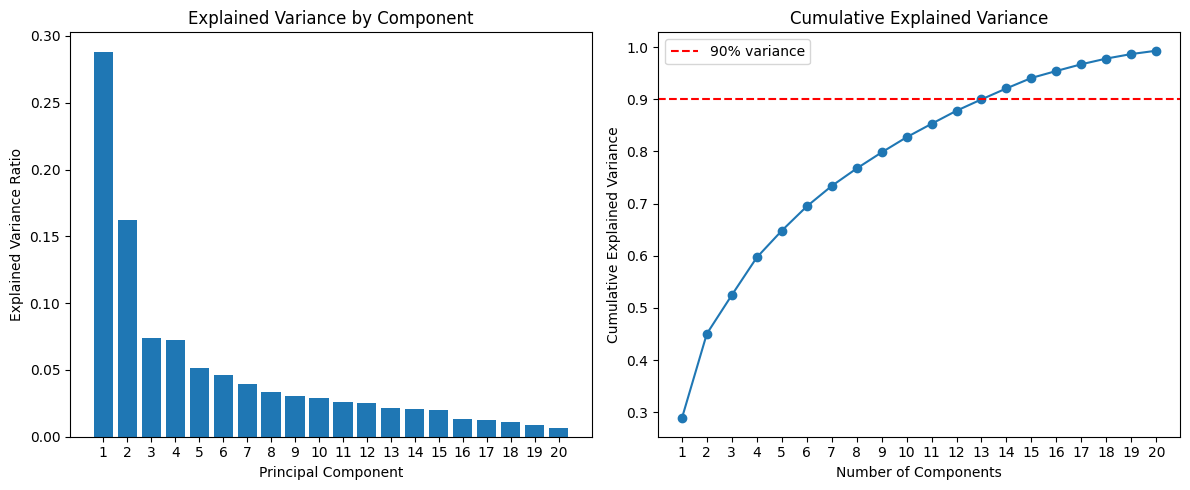

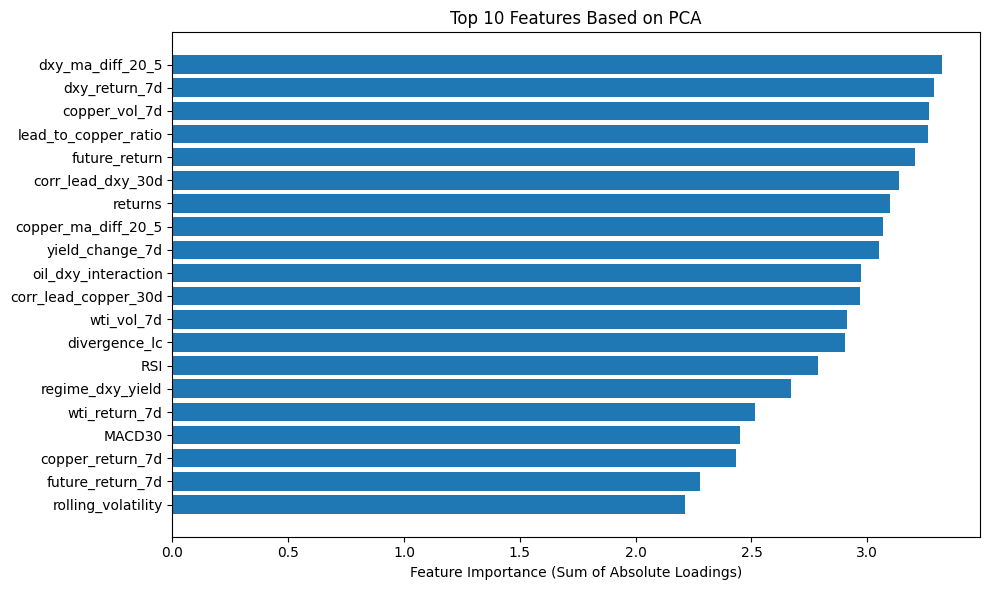


Top 20 Feature Names:
['dxy_ma_diff_20_5', 'dxy_return_7d', 'copper_vol_7d', 'lead_to_copper_ratio', 'future_return', 'corr_lead_dxy_30d', 'returns', 'copper_ma_diff_20_5', 'yield_change_7d', 'oil_dxy_interaction', 'corr_lead_copper_30d', 'wti_vol_7d', 'divergence_lc', 'RSI', 'regime_dxy_yield', 'wti_return_7d', 'MACD30', 'copper_return_7d', 'future_return_7d', 'rolling_volatility']


In [20]:
# PCA Analysis to determine top 20 features
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print explained variance for first 20 components
print("Explained Variance Ratio for first 20 components:")
for i in range(min(20, len(explained_variance))):
    print(f"PC{i+1}: {explained_variance[i]:.4f} ({explained_variance[i]*100:.2f}%)")

print(f"\nCumulative variance for first 20 components: {cumulative_variance[9]:.4f} ({cumulative_variance[9]*100:.2f}%)")

# Get component loadings (correlations between features and principal components)
component_loadings = pca.components_.T  # Transpose to get features x components

# Calculate feature importance based on absolute loadings across top components
# We'll use the first 20 components to determine top features
n_components_to_use = min(20, len(pca.components_))
feature_importance = np.abs(component_loadings[:, :n_components_to_use]).sum(axis=1)

# Create DataFrame with feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(f"\nTop 20 Features based on PCA:")
print(feature_importance_df.head(20).to_string(index=False))

# Visualize explained variance
plt.figure(figsize=(12, 5))

# Plot 1: Explained variance per component
plt.subplot(1, 2, 1)
plt.bar(range(1, min(21, len(explained_variance)+1)), explained_variance[:20])
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Component')
plt.xticks(range(1, min(21, len(explained_variance)+1)))

# Plot 2: Cumulative explained variance
plt.subplot(1, 2, 2)
plt.plot(range(1, min(21, len(cumulative_variance)+1)), cumulative_variance[:20], marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.legend()
plt.xticks(range(1, min(21, len(cumulative_variance)+1)))

plt.tight_layout()
plt.show()

# Visualize top 20 features
plt.figure(figsize=(10, 6))
top_20_features = feature_importance_df.head(20)
plt.barh(range(len(top_20_features)), top_20_features['Importance'].values)
plt.yticks(range(len(top_20_features)), top_20_features['Feature'].values)
plt.xlabel('Feature Importance (Sum of Absolute Loadings)')
plt.title('Top 10 Features Based on PCA')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Store top 20 feature names
top_20_feature_names = top_20_features['Feature'].tolist()
print(f"\nTop 20 Feature Names:")
print(top_20_feature_names)


In [21]:
# Features data description
stat = X.describe(percentiles=[.01,.05,.5,.95,.99]).T
stat['missing'] = X.isna().sum()
stat['skew'] = X.skew(numeric_only=True)
stat['kurt'] = X.kurt(numeric_only=True)

# IQR outliers (outside [Q1-3*IQR, Q3+3*IQR])
q1, q3 = X.quantile(.25), X.quantile(.75)
iqr = q3 - q1
out_mask = (X.lt(q1 - 3*iqr)) | (X.gt(q3 + 3*iqr))
stat['outliers_iqr3'] = out_mask.sum()

# Robust MAD z-score (good for heavy tails)
med = X.median()
mad = (X - med).abs().median() * 1.4826
mad_z = (X - med).div(mad.replace(0, np.nan)).abs()
stat['outliers_mad5'] = (mad_z > 5).sum()

stat.sort_values('outliers_mad5', ascending=False)

,count,mean,std,min,1%,5%,50%,95%,99%,max,missing,skew,kurt,outliers_iqr3,outliers_mad5
oil_dxy_interaction,6110.0,-0.000162,0.001123,-0.022800,-0.003542,-0.001492,-0.000033,0.000877,0.002362,0.012188,0,-4.225763,80.298666,354,354
wti_vol_7d,6110.0,0.022929,0.042681,0.002151,0.006261,0.008562,0.018648,0.043527,0.076475,1.230410,0,24.420035,663.626716,144,135
MACD15,6110.0,1.297182,30.651979,-185.453805,-99.680294,-43.614407,1.745265,43.602108,85.062939,187.758830,0,-0.464842,6.446088,121,107
copper_ma_diff_20_5,6110.0,-0.005118,0.078526,-0.413485,-0.217655,-0.126543,-0.005128,0.120760,0.242236,0.510191,0,0.458334,5.086981,118,104
MACD30,6110.0,-0.470984,9.402044,-55.188039,-26.463186,-13.653813,-0.518982,12.936916,32.145024,52.342105,0,0.456341,6.099656,112,103
copper_vol_7d,6110.0,0.015173,0.008577,0.002204,0.004604,0.006477,0.013270,0.030557,0.048936,0.086613,0,2.652147,12.280658,98,98
MACD5,6110.0,2.435635,68.018248,-429.321706,-212.440108,-99.044994,2.912487,98.551493,190.401322,430.302862,0,-0.368123,6.143219,112,96
future_rolling_volatility,6110.0,0.016650,0.007703,0.005172,0.006516,0.008375,0.014438,0.031979,0.043821,0.056590,0,1.614125,3.360254,41,88
rolling_volatility,6110.0,0.017675,0.007862,0.004329,0.007598,0.009434,0.015128,0.033905,0.042219,0.060838,0,1.656334,3.556543,34,86
wti_return_7d,6110.0,0.002419,0.076914,-2.592467,-0.163615,-0.097594,0.005791,0.093982,0.160796,0.908428,0,-6.573363,240.767303,41,38


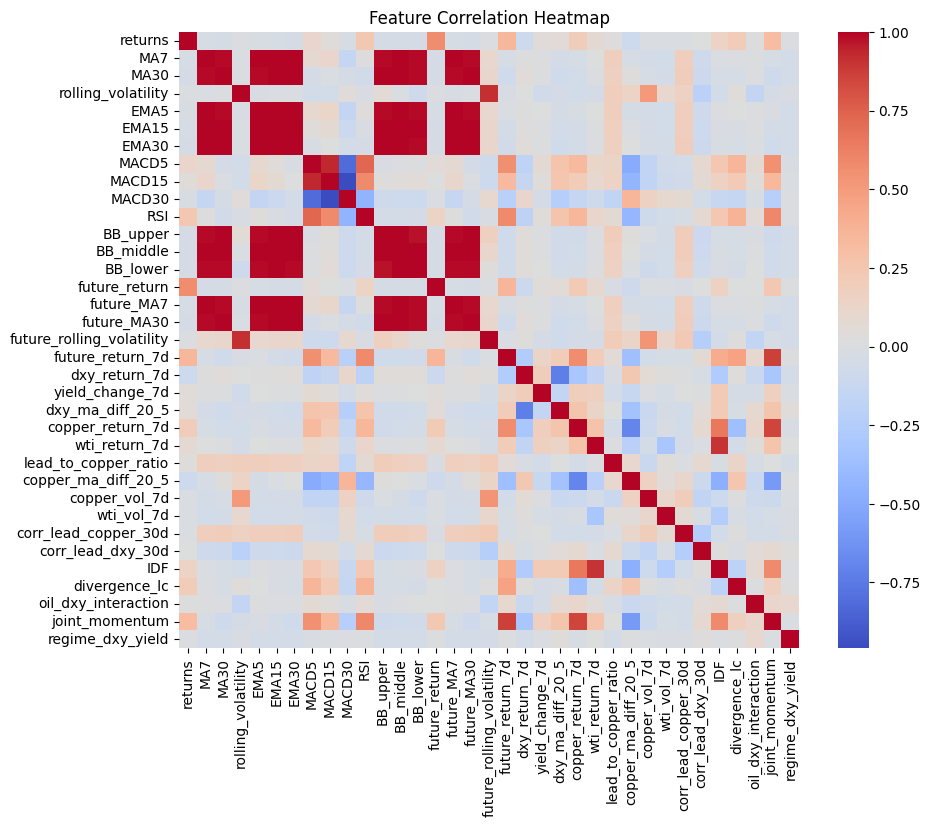

In [22]:
# Set path to store figures
figure_path = Path("../src/interpretation")

# plot the heatmap for feaature correlaation
corr = X.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")

plt.title("Feature Correlation Heatmap")

# save the figure
plt.savefig(os.path.join(figure_path, "feature_corr_heatmap.png"), dpi=300, bbox_inches="tight")

plt.show()

HIGH CORRELATION PAIRS IN TOP 20 PCA FEATURES

No high correlation pairs found (|correlation| > 0.85) among top 20 PCA features.


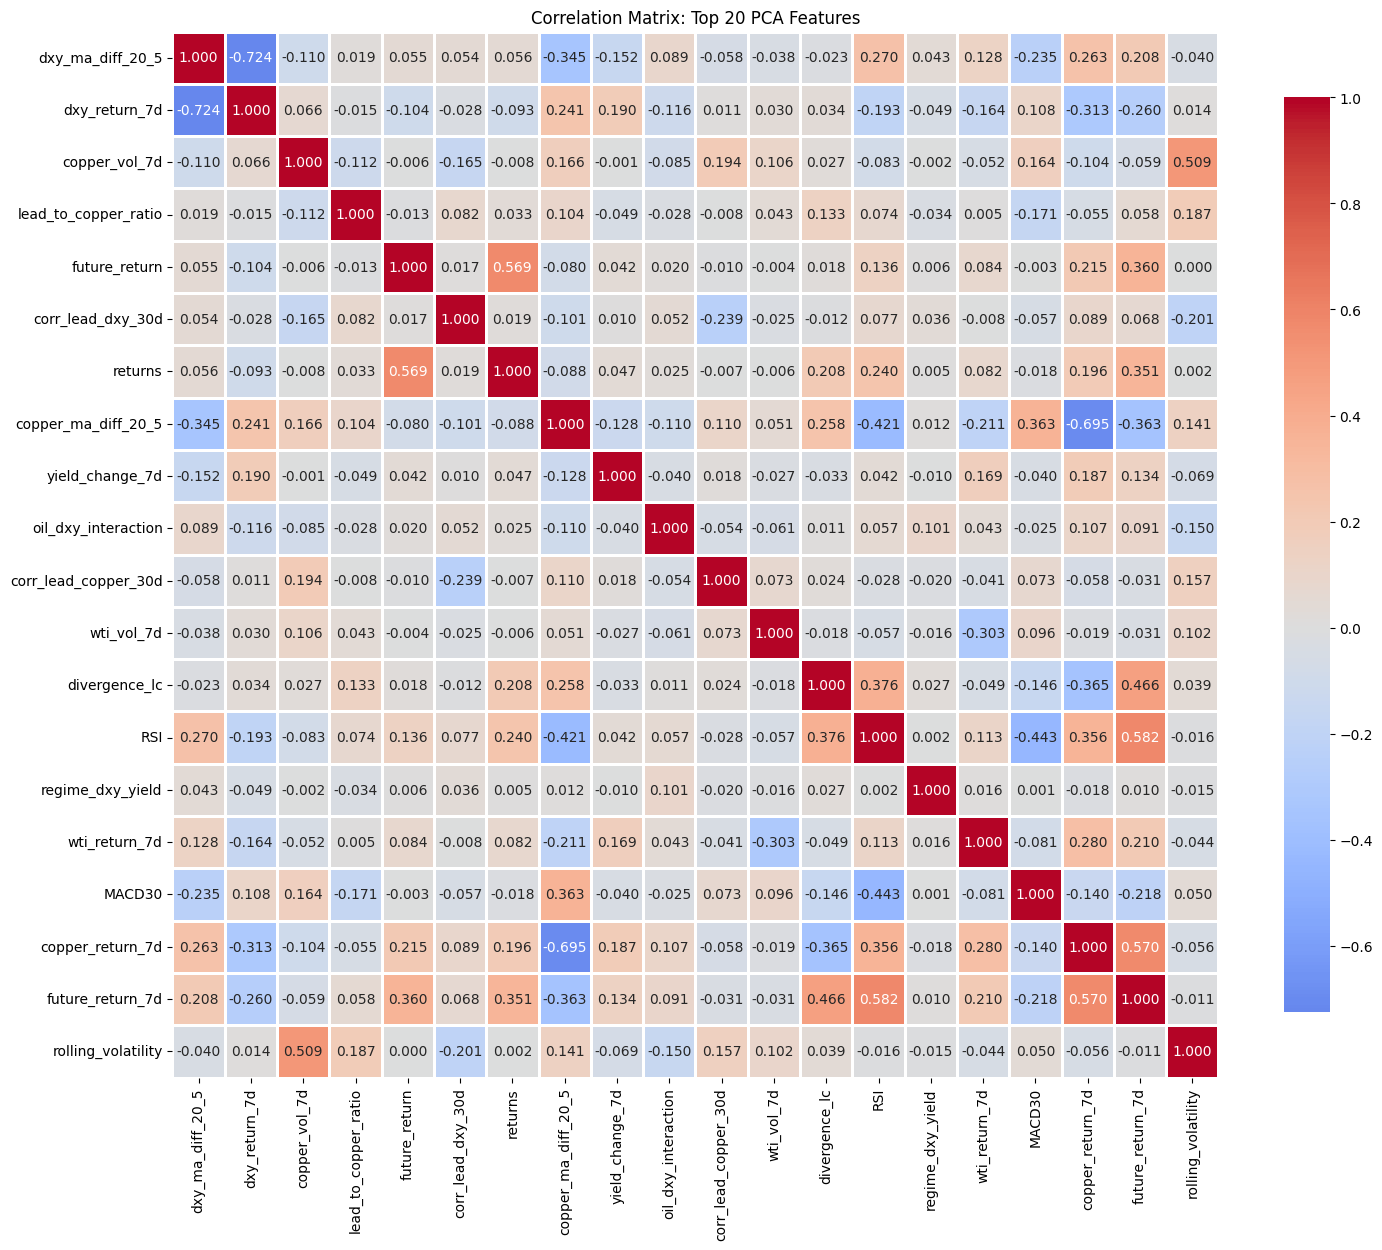

In [23]:
# Check high correlation among top 10 features from first PCA (Cell 4)
# Filter high correlation pairs to only include pairs where both features are in top 10

# Top 20 features from first PCA (Cell 4)
top_20_pca_features = ['dxy_ma_diff_20_5', 'dxy_return_7d', 'copper_vol_7d', 
                       'lead_to_copper_ratio', 'future_return', 'corr_lead_dxy_30d', 'returns', 
                       'copper_ma_diff_20_5', 'yield_change_7d', 'oil_dxy_interaction', 
                       'corr_lead_copper_30d', 'wti_vol_7d', 'divergence_lc', 'RSI', 
                       'regime_dxy_yield', 'wti_return_7d', 'MACD30', 'copper_return_7d', 
                       'future_return_7d', 'rolling_volatility']

# Get correlation matrix for all features
corr_matrix = X.corr()

# Find high correlation pairs among top 10 PCA features
top_20_high_corr_pairs = []
for i in top_20_pca_features:
    for j in top_20_pca_features:
        if i < j:  # Only check upper triangle to avoid duplicates
            if i in corr_matrix.columns and j in corr_matrix.columns:
                corr_val = corr_matrix.loc[i, j]
                if abs(corr_val) > 0.85:  # High correlation threshold
                    top_20_high_corr_pairs.append({
                        'Feature1': i,
                        'Feature2': j,
                        'Correlation': corr_val
                    })

# Convert to DataFrame for better display
if top_20_high_corr_pairs:
    top_20_high_corr_df = pd.DataFrame(top_20_high_corr_pairs)
    top_20_high_corr_df = top_20_high_corr_df.sort_values('Correlation', key=abs, ascending=False)
    
    print("="*60)
    print("HIGH CORRELATION PAIRS IN TOP 20 PCA FEATURES")
    print("="*60)
    print(f"\nFound {len(top_20_high_corr_pairs)} high correlation pairs (|correlation| > 0.85):\n")
    print(top_20_high_corr_df.to_string(index=False))
    
    print(f"\nSummary:")
    print(f"  Total high correlation pairs in top 20: {len(top_20_high_corr_pairs)}")
    print(f"  Positive correlations: {(top_20_high_corr_df['Correlation'] > 0).sum()}")
    print(f"  Negative correlations: {(top_20_high_corr_df['Correlation'] < 0).sum()}")
    if len(top_20_high_corr_df) > 0:
        print(f"  Max correlation: {top_20_high_corr_df['Correlation'].abs().max():.4f}")
        print(f"  Min correlation: {top_20_high_corr_df['Correlation'].abs().min():.4f}")
    
    # Visualize correlation matrix for top 20 features
    plt.figure(figsize=(10, 8))
    top_20_corr = corr_matrix.loc[top_20_pca_features, top_20_pca_features]
    sns.heatmap(top_20_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix: Top 20 PCA Features')
    plt.tight_layout()
    
    # Save the figure
    figure_path = Path("../src/interpretation")
    plt.savefig(os.path.join(figure_path, "top10_pca_features_correlation.png"), dpi=300, bbox_inches="tight")
    plt.show()
    
    # Save high correlation pairs to CSV
    output_path = Path("../src/data/top20_pca_high_correlation_pairs.csv")
    top_20_high_corr_df.to_csv(output_path, index=False)
    print(f"\nHigh correlation pairs saved to: {output_path}")
else:
    print("="*60)
    print("HIGH CORRELATION PAIRS IN TOP 20 PCA FEATURES")
    print("="*60)
    print("\nNo high correlation pairs found (|correlation| > 0.85) among top 20 PCA features.")
    
    # Still show correlation matrix for visualization
    plt.figure(figsize=(15, 13))
    top_20_corr = corr_matrix.loc[top_20_pca_features, top_20_pca_features]
    sns.heatmap(top_20_corr, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix: Top 20 PCA Features')
    plt.tight_layout()
    plt.show()



Original data shape: (6110, 19)
Missing values per feature:
dxy_ma_diff_20_5        0
dxy_return_7d           0
copper_vol_7d           0
future_return           0
corr_lead_dxy_30d       0
returns                 0
copper_ma_diff_20_5     0
yield_change_7d         0
oil_dxy_interaction     0
corr_lead_copper_30d    0
wti_vol_7d              0
divergence_lc           0
RSI                     0
regime_dxy_yield        0
wti_return_7d           0
MACD30                  0
copper_return_7d        0
future_return_7d        0
rolling_volatility      0
dtype: int64

Data shape after dropping missing values: (6110, 19)
Rows dropped: 0
VIF ANALYSIS - TOP 20 PCA FEATURES

VIF values for top 20 PCA features:

             Feature      VIF
    copper_return_7d 8.873712
    future_return_7d 8.576335
  rolling_volatility 8.062275
                 RSI 6.924403
       divergence_lc 6.825786
       copper_vol_7d 5.811483
corr_lead_copper_30d 3.441688
 copper_ma_diff_20_5 2.559076
    dxy_ma_diff_20_5

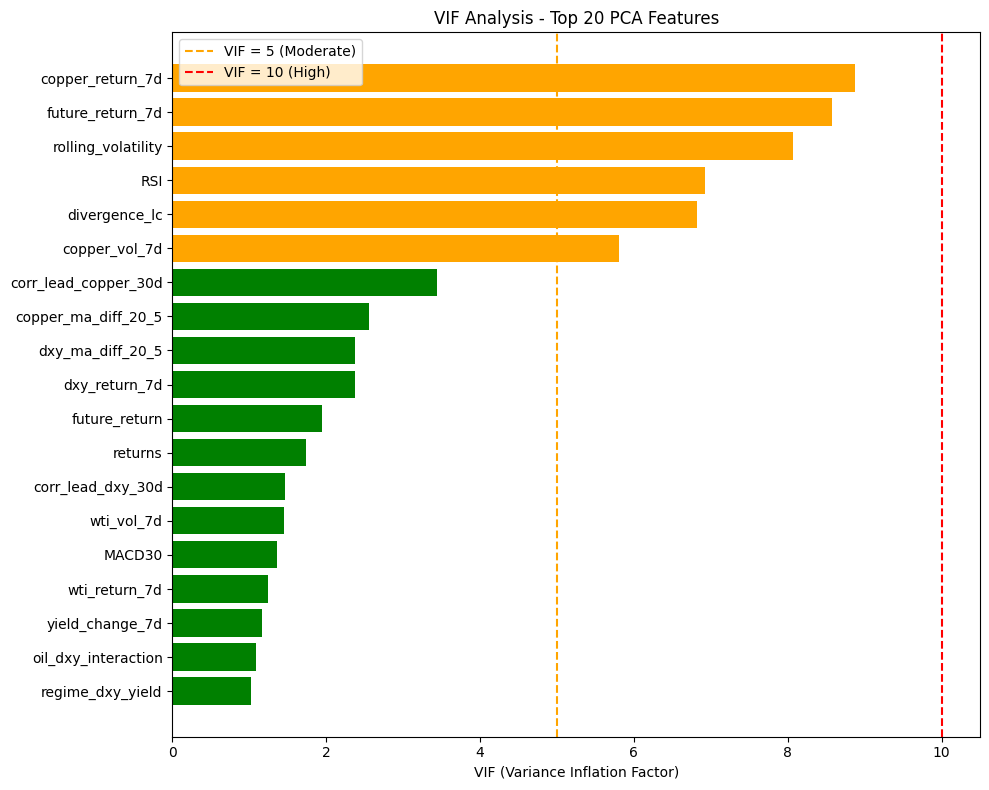


Correlation Matrix for Top 20 PCA Features:

Max absolute correlation: 0.5820
Min absolute correlation: 0.0004


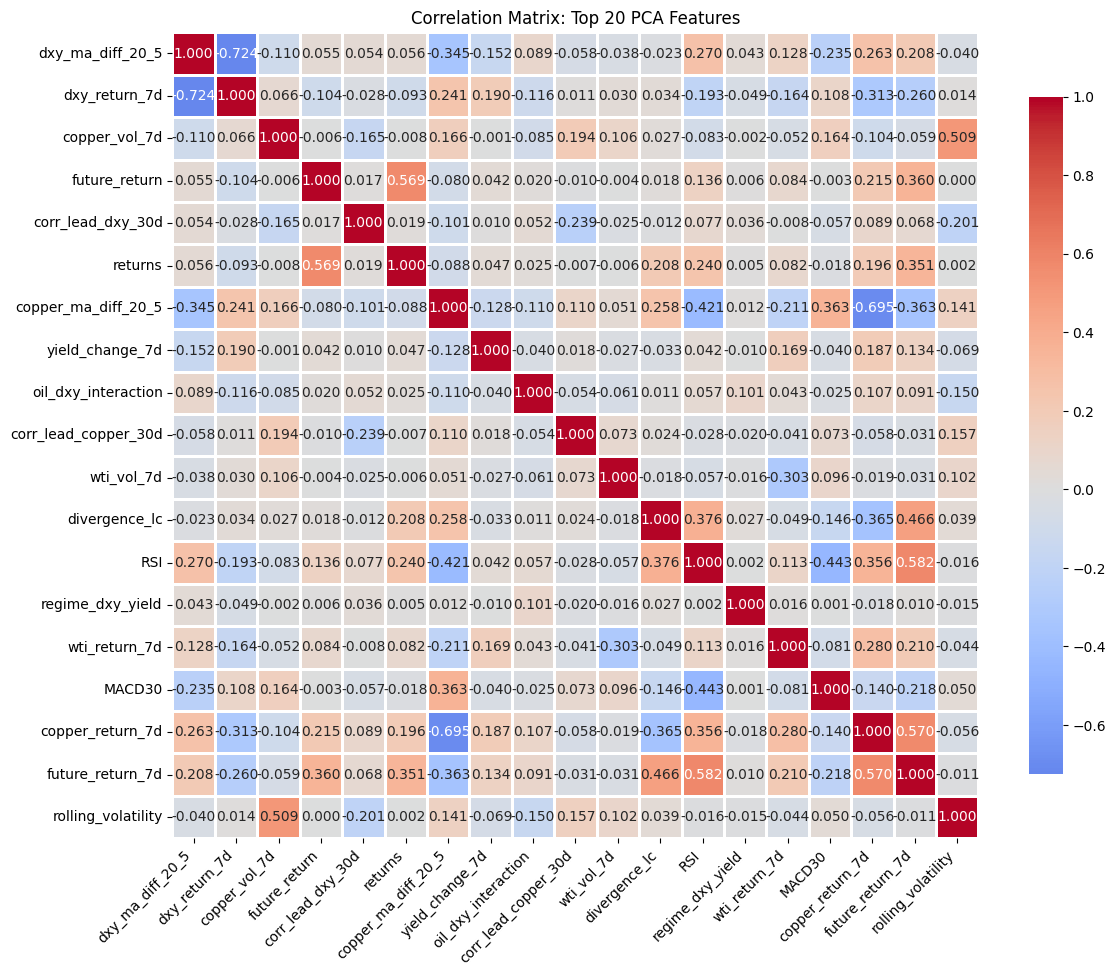


RECOMMENDATIONS:

[OK] No features with high VIF (>= 10) detected.

[WARNING] 6 features have moderate VIF (5-10).
   Monitor these features, but they may be acceptable depending on model type.
   Moderate VIF features: ['copper_return_7d', 'future_return_7d', 'rolling_volatility', 'RSI', 'divergence_lc', 'copper_vol_7d']

[OK] Average VIF is low (< 5), indicating minimal multicollinearity overall.
   All 20 features can likely be used for model training.

SUGGESTED FEATURE SET FOR MODEL TRAINING:
All 20 features can be used (no high VIF features).


In [25]:
# VIF (Variance Inflation Factor) Analysis for Top 20 PCA Features
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use the top 20 features identified in Cell 4
# Top 20 features from PCA analysis
top_20_pca_features = ['dxy_ma_diff_20_5', 'dxy_return_7d', 'copper_vol_7d', 
                       'future_return', 'corr_lead_dxy_30d', 'returns', 
                       'copper_ma_diff_20_5', 'yield_change_7d', 'oil_dxy_interaction', 
                       'corr_lead_copper_30d', 'wti_vol_7d', 'divergence_lc', 'RSI', 
                       'regime_dxy_yield', 'wti_return_7d', 'MACD30', 'copper_return_7d', 
                       'future_return_7d', 'rolling_volatility']

# Select only the top 20 features from X
X_top20 = X[top_20_pca_features].copy()

# Check for missing values and drop them (VIF requires complete data)
print(f"Original data shape: {X_top20.shape}")
print(f"Missing values per feature:")
print(X_top20.isna().sum())
X_top20_clean = X_top20.dropna()
print(f"\nData shape after dropping missing values: {X_top20_clean.shape}")
print(f"Rows dropped: {len(X_top20) - len(X_top20_clean)}")

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_top20_clean.columns
vif_data["VIF"] = [variance_inflation_factor(X_top20_clean.values, i)
                   for i in range(X_top20_clean.shape[1])]

# Sort by VIF value (descending)
vif_data = vif_data.sort_values('VIF', ascending=False)

print("="*60)
print("VIF ANALYSIS - TOP 20 PCA FEATURES")
print("="*60)
print(f"\nVIF values for top 20 PCA features:\n")
print(vif_data.to_string(index=False))

# Check VIF thresholds
high_vif_threshold = 10
moderate_vif_threshold = 5

high_vif = vif_data[vif_data['VIF'] >= high_vif_threshold]
moderate_vif = vif_data[(vif_data['VIF'] >= moderate_vif_threshold) & (vif_data['VIF'] < high_vif_threshold)]
low_vif = vif_data[vif_data['VIF'] < moderate_vif_threshold]

print(f"\n{'='*60}")
print("VIF Summary:")
print(f"  High VIF (>= 10): {len(high_vif)} features")
if len(high_vif) > 0:
    print(f"    {high_vif['Feature'].tolist()}")
print(f"  Moderate VIF (5-10): {len(moderate_vif)} features")
if len(moderate_vif) > 0:
    print(f"    {moderate_vif['Feature'].tolist()}")
print(f"  Low VIF (< 5): {len(low_vif)} features")
if len(low_vif) > 0:
    print(f"    {low_vif['Feature'].tolist()}")
print(f"\n  Average VIF: {vif_data['VIF'].mean():.2f}")
print(f"  Max VIF: {vif_data['VIF'].max():.2f}")
print(f"  Min VIF: {vif_data['VIF'].min():.2f}")

# Visualize VIF values
plt.figure(figsize=(10, 8))
colors = ['red' if v >= 10 else 'orange' if v >= 5 else 'green' for v in vif_data['VIF']]
plt.barh(range(len(vif_data)), vif_data['VIF'].values, color=colors)
plt.yticks(range(len(vif_data)), vif_data['Feature'].values)
plt.xlabel('VIF (Variance Inflation Factor)')
plt.title('VIF Analysis - Top 20 PCA Features')
plt.axvline(x=5, color='orange', linestyle='--', label='VIF = 5 (Moderate)')
plt.axvline(x=10, color='red', linestyle='--', label='VIF = 10 (High)')
plt.legend()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Show correlation matrix for these 20 features
print(f"\n{'='*60}")
print("Correlation Matrix for Top 20 PCA Features:")
print("="*60)
corr_top20 = X_top20_clean.corr()
print(f"\nMax absolute correlation: {corr_top20.values[np.triu_indices_from(corr_top20.values, k=1)].max():.4f}")
print(f"Min absolute correlation: {np.abs(corr_top20.values[np.triu_indices_from(corr_top20.values, k=1)]).min():.4f}")

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_top20, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, 
            xticklabels=corr_top20.columns, yticklabels=corr_top20.columns)
plt.title('Correlation Matrix: Top 20 PCA Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Recommendations
print(f"\n{'='*60}")
print("RECOMMENDATIONS:")
print("="*60)
if len(high_vif) > 0:
    print(f"\n[WARNING] {len(high_vif)} features have high VIF (>= 10), indicating multicollinearity.")
    print("   Consider removing these features or using dimensionality reduction techniques.")
    print(f"   High VIF features: {high_vif['Feature'].tolist()}")
else:
    print("\n[OK] No features with high VIF (>= 10) detected.")

if len(moderate_vif) > 0:
    print(f"\n[WARNING] {len(moderate_vif)} features have moderate VIF (5-10).")
    print("   Monitor these features, but they may be acceptable depending on model type.")
    print(f"   Moderate VIF features: {moderate_vif['Feature'].tolist()}")
else:
    print("\n[OK] No features with moderate VIF (5-10) detected.")

if vif_data['VIF'].mean() < 5:
    print("\n[OK] Average VIF is low (< 5), indicating minimal multicollinearity overall.")
    print("   All 20 features can likely be used for model training.")
elif vif_data['VIF'].mean() < 10:
    print("\n[WARNING] Average VIF is moderate (5-10).")
    print("   Consider removing features with highest VIF values.")
else:
    print("\n[WARNING] Average VIF is high (>= 10).")
    print("   Strong multicollinearity detected. Feature selection recommended.")

print(f"\n{'='*60}")
print("SUGGESTED FEATURE SET FOR MODEL TRAINING:")
print("="*60)
if len(high_vif) == 0:
    print("All 20 features can be used (no high VIF features).")
else:
    # Suggest removing high VIF features
    suggested_features = [f for f in top_20_pca_features if f not in high_vif['Feature'].tolist()]
    print(f"Suggested: Remove {len(high_vif)} high VIF features, keep {len(suggested_features)} features.")
    print(f"\nFeatures to keep ({len(suggested_features)}):")
    for i, feat in enumerate(suggested_features, 1):
        vif_val = vif_data[vif_data['Feature'] == feat]['VIF'].values[0]
        print(f"  {i:2d}. {feat:25s} (VIF: {vif_val:.2f})")
    print(f"\nFeatures to remove ({len(high_vif)}):")
    for i, feat in enumerate(high_vif['Feature'].tolist(), 1):
        vif_val = high_vif[high_vif['Feature'] == feat]['VIF'].values[0]
        print(f"  {i:2d}. {feat:25s} (VIF: {vif_val:.2f})")
